# FOOOF 

## 0.Loading packages, defining paths

In [1]:
# Importing Python and external packages


import os
import sys
import importlib
from importlib import reload 
from dataclasses import dataclass, field, fields
from itertools import compress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

import fooof

import scipy
import scipy.io as sio
from scipy import signal
from scipy.signal import spectrogram, hann, butter, filtfilt, freqz
from scipy import stats

import seaborn as sns
import pingouin as pg
import itertools
from itertools import combinations
from statannotations.Annotator import Annotator
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report

# import openpyxl
# from openpyxl import Workbook, load_workbook
# import xlrd
import pickle
import json
import csv

#mne
import mne_bids
import mne
from mne.time_frequency import tfr_morlet 


# TODO: add README file: 
# pip install pingouin
# pip install statannotations
         

Import PyPerceive (has already been installed into the environment bssu)


In [2]:
import py_perceive

Load PyPerceive

In [3]:
from py_perceive.PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)
import py_perceive.PerceiveImport.methods.load_rawfile as load_rawfile
import py_perceive.PerceiveImport.methods.find_folders as find_folders
import py_perceive.PerceiveImport.methods.metadata_helpers as metaHelpers


importlib.reload(main_class)
importlib.reload(session_class)
importlib.reload(task_class)
importlib.reload(condition_class)
importlib.reload(contact_class)
importlib.reload(metadata_class)
importlib.reload(modality_class)
importlib.reload(load_rawfile)
importlib.reload(find_folders)
importlib.reload(run_class)
importlib.reload(metaHelpers)

<module 'py_perceive.PerceiveImport.methods.metadata_helpers' from 'C:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\src\\py_perceive\\PerceiveImport\\methods\\metadata_helpers.py'>

Import Gunnar`s meet Toolbox

In [4]:
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'Longterm_beta_project','Code', 'meet')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()

import meet as meet

Set Path back to BetaSenSightLongterm Repo

In [5]:
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'Longterm_beta_project','Code', 'BetaSenSightLongterm')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()

'c:\\Users\\jebe12\\Research\\Longterm_beta_project\\Code\\BetaSenSightLongterm'

Load analysis functions

In [23]:
# tfr, processing
import src.bssu.tfr.BSSuPsd as BSSuPsd
import src.bssu.tfr.FastFourierPSD as FFpsd
import src.bssu.tfr.time_frequency_beta_erd_fooof_fit as tfr_fooof
import src.bssu.tfr.fooof_fit as fooof_fit

# bipolar Channel Analysis
import src.bssu.bipolar.PowerSpectra_withinChannels_Plot as PowerSpectraChannels
import src.bssu.bipolar.PeakFrequencies_PSD as PeakFrequency_psd
import src.bssu.bipolar.BIP_channelGroups as BIP_channelGroups
import src.bssu.bipolar.BIP_perChannelAnalysis as BIP_perChannel


# monopolar Referencing
import src.bssu.monopolar.MonoRef_JLB as MonoRefJLB
import src.bssu.monopolar.GroupMonopolarPSD as groupMonopol

# Ranking Order
import src.bssu.ranking.HighestRankedChannelPSD as highestRank
import src.bssu.ranking.monopolPSDaverage_withinSubject as PSDaverageMonopol
import src.bssu.ranking.BIPchannelGroups_ranks as BIP_ranks
import src.bssu.ranking.Permutation_rankings as Permute_ranks


# Clinical stimulation parameters
import src.bssu.stimulation.activeStimulationContacts as activeStimContacts

# utility functions
import src.bssu.utils.loadResults as loadResults
import src.bssu.utils.find_folders as find_folders
import src.bssu.utils.writeGroupDataframes as writeGroupDF

# import Classes
from src.bssu.classes import (metadataAnalysis_class, mainAnalysis_class, sessionAnalysis_class, 
                              channelAnalysis_class, featureAnalysis_class, frequencyBand_class)

# import mni coordinates
import src.bssu.mni.load_rotated_coordinates as load_mni


importlib.reload(BSSuPsd)
importlib.reload(MonoRefJLB)
importlib.reload(loadResults)
importlib.reload(highestRank)
importlib.reload(groupMonopol)
importlib.reload(PSDaverageMonopol)
importlib.reload(FFpsd)
importlib.reload(find_folders)
importlib.reload(metadataAnalysis_class)
importlib.reload(mainAnalysis_class)
importlib.reload(sessionAnalysis_class)
importlib.reload(channelAnalysis_class)
importlib.reload(featureAnalysis_class)
importlib.reload(frequencyBand_class)
importlib.reload(PeakFrequency_psd)
importlib.reload(PowerSpectraChannels)
importlib.reload(BIP_channelGroups)
importlib.reload(BIP_ranks)
importlib.reload(activeStimContacts)
importlib.reload(Permute_ranks)
importlib.reload(BIP_perChannel)
importlib.reload(load_mni)
importlib.reload(writeGroupDF)
importlib.reload(tfr_fooof)
importlib.reload(fooof_fit)

<module 'src.bssu.tfr.fooof_fit' from 'c:\\Users\\jebe12\\Research\\Longterm_beta_project\\Code\\BetaSenSightLongterm\\src\\bssu\\tfr\\fooof_fit.py'>

In [11]:
# load if you want to see complete Dataframes
pd.set_option("display.max_rows", None)

Load one Json file with fooof results: filename "fooof_model_sub{subject}.json"

In [45]:
fooof_result = loadResults.load_fooof_json(subject="038")
fooof_result.head()

,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_knee,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth
038_Right_postop_03,038_Right,postop,03,0.075850,0.983955,2.951598,3.821656,8238.863591,3,"[11.262783125, 0.5340594119, 2.6816684184]","[None, None, None]","[30.4585274208, 0.7459954805, 8.9143887796]","[30.4585274208, 0.7459954805, 8.9143887796]","[None, None, None]"
038_Right_postop_13,038_Right,postop,13,0.074735,0.987267,4.889871,7.422845,24934786.850784,4,"[11.6242442557, 0.8423572452, 2.4332127113]","[19.5575308147, 0.3685572203, 5.0207275819]","[29.9225822225, 0.4240773507, 9.2589067496]","[29.9225822225, 0.4240773507, 9.2589067496]","[None, None, None]"
038_Right_postop_02,038_Right,postop,02,0.083622,0.981007,3.670156,5.091101,125325.152483,3,"[11.758557389, 0.6418093898, 2.2692949931]","[None, None, None]","[30.5667711191, 0.6042920284, 9.5907245111]","[30.5667711191, 0.6042920284, 9.5907245111]","[81.0, 0.1978789777, 20.0]"
038_Right_postop_12,038_Right,postop,12,0.075427,0.985048,3.874234,5.574776,413515.581135,3,"[11.3773183524, 0.6117007154, 2.575793912]","[None, None, None]","[32.8105214878, 0.4226541158, 4.991785612]","[32.8105214878, 0.4226541158, 4.991785612]","[None, None, None]"
038_Right_postop_01,038_Right,postop,01,0.089415,0.977367,3.850514,5.549750,881079.42914,4,"[11.9088949918, 0.9286514717, 2.122208365]","[18.0846737131, 0.4371999996, 4.4341419902]","[27.5477441159, 0.5718073054, 9.4737097832]","[27.5477441159, 0.5718073054, 9.4737097832]","[None, None, None]"


Write a group Dataframe concatenating all DF from each subject folder

In [9]:
fooof_group_result = writeGroupDF.write_fooof_group_json(
    incl_sub=["017", "019", "021", "024", "025", "026", "028", "029", "030", "031", "032", "033", "038"]
)

In [13]:
fooof_group_result.head()

,subject_hemisphere,session,bipolar_channel,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_knee,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth
0,017_Right,fu3m,03,0.062071,0.984228,1.789802,1.510125,wo_knee,4,"[None, None, None]","[None, None, None]","[29.1230769409, 0.5757473113, 6.9654712301]","[29.1230769409, 0.5757473113, 6.9654712301]","[None, None, None]"
1,017_Right,fu3m,13,0.086020,0.961885,1.494661,1.099469,wo_knee,4,"[None, None, None]","[None, None, None]","[29.2192804454, 0.9026002023, 2.9996984052]","[29.2192804454, 0.9026002023, 2.9996984052]","[None, None, None]"
2,017_Right,fu3m,02,0.082106,0.972390,1.754591,1.557219,wo_knee,4,"[None, None, None]","[None, None, None]","[29.52639043, 1.0032092798, 6.4720784861]","[29.52639043, 1.0032092798, 6.4720784861]","[None, None, None]"
3,017_Right,fu3m,12,0.094479,0.949418,3.197360,4.266728,69876.354037,3,"[None, None, None]","[None, None, None]","[29.0569975142, 0.7209673255, 4.0650624862]","[29.0569975142, 0.7209673255, 4.0650624862]","[82.7458266127, 0.3105218111, 4.4872275805]"
4,017_Right,fu3m,01,0.067213,0.976017,1.573552,1.132607,wo_knee,4,"[None, None, None]","[None, None, None]","[30.8852999093, 0.3194295567, 8.4306160856]","[30.8852999093, 0.3194295567, 8.4306160856]","[64.6314589389, 0.1981129703, 9.4143048634]"


## 1. fit a FOOOF model to find the highest Peak in freq bands: alpha, low beta, high beta, gamma

Use automatized code to fit FOOOF model on each channel of all patients

In [46]:
fooof_model = fooof_fit.fooof_fit_tfr(
    ["038"]
)

Load single power_spectra

In [8]:
# Import required code for visualizing example models
from fooof import FOOOF
from fooof.sim.utils import set_random_seed
from fooof.plts.spectra import plot_spectrum
from fooof.plts.annotate import plot_annotated_model

# Import Bands object, to manage frequency band definitions
from fooof.bands import Bands

# Import utility functions that manage & manipulate FOOOF objects
from fooof.objs.utils import average_fg, combine_fooofs, compare_info

In [123]:
data_power_spectrum = mainAnalysis_class.MainClass(
        sub="025",
        hemisphere="Right",
        filter="unfiltered",
        result="PowerSpectrum",
        incl_session=["postop", "fu3m", "fu12m", "fu18m"],
        pickChannels=['03', '13', '02', '12', '01', '23', 
                        '1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C', 
                        '1A2A', '1B2B', '1C2C'],
        normalization=["rawPsd"],
        feature=["frequency", "time_sectors", "rawPsd", "SEM_rawPsd"]
    )

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 5 - 95 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                     1.3083, 74.6740, 1.7567                                      
                                                                                                  
                                       3 peaks were found:                                        
          

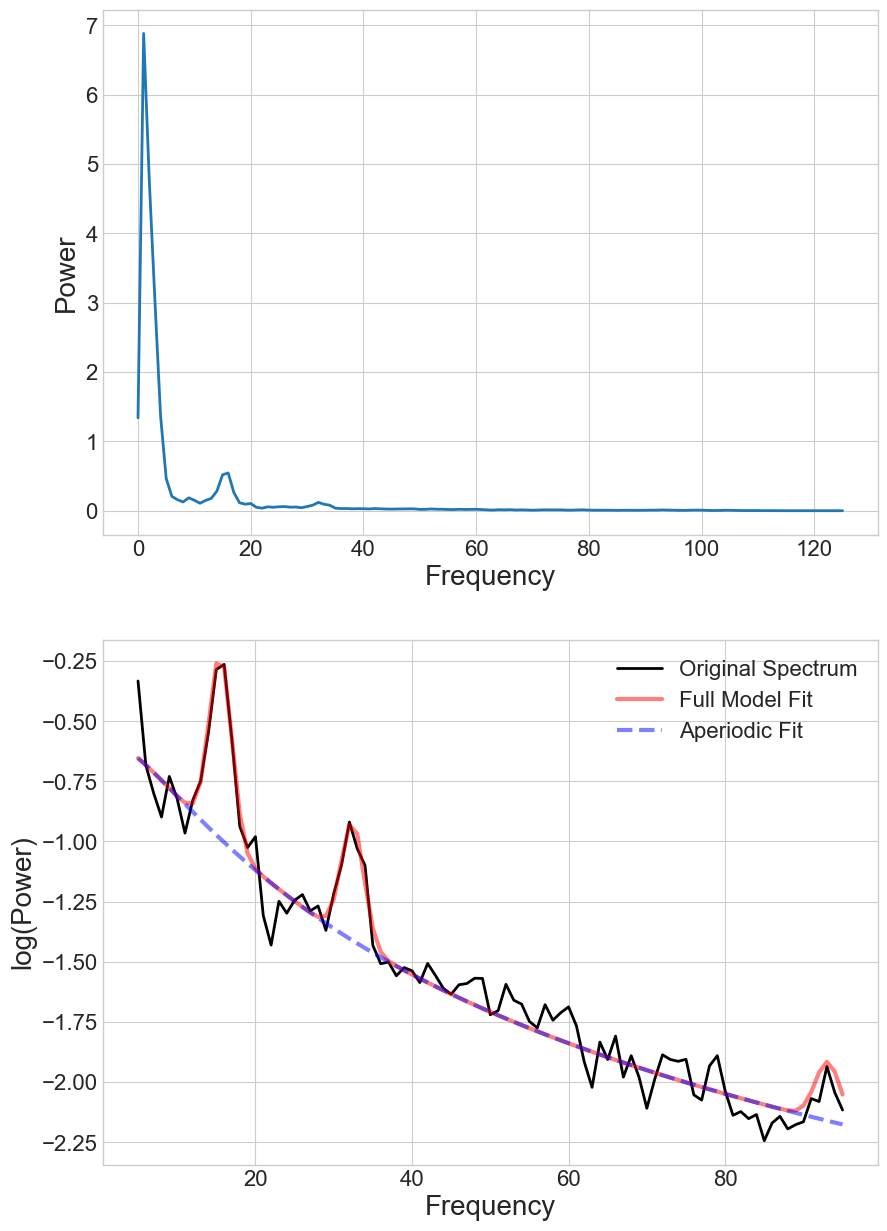

In [132]:
# save power spectrum and frequencies as arrays

power_spectrum = np.array(data_power_spectrum.postop.BIP_1B2B.rawPsd.data)
freqs = np.array(data_power_spectrum.postop.BIP_1B2B.frequency.data)
freq_range = [5, 95]


############ SET PLOT LAYOUT ############
fig, ax = plt.subplots(2,1, figsize=(10,15))

# Plot the unfiltered Power spectrum in first ax
plot_spectrum(freqs, power_spectrum, log_freqs=False, log_powers=False,
                  ax=ax[0])
# ax[0].plot(freqs, power_spectrum)


############ SET FOOOF MODEL ############
model = fooof.FOOOF(
        peak_width_limits=(2, 20.0),
        max_n_peaks=4,
        min_peak_height=0.0,
        peak_threshold=1.0,
        aperiodic_mode="knee", # fitting without knee component
        verbose=True,
    )

# always fit a large Frequency band, later you can select Peaks within specific freq bands
model.fit(freqs=freqs, power_spectrum=power_spectrum, freq_range=freq_range)

# Plot an example power spectrum, with a model fit in second ax
# model.plot(plot_peaks='shade', peak_kwargs={'color' : 'green'}, ax=ax[1])
model.plot(ax=ax[1])

# print the result in third ax
model.print_results()

############ SAVE APERIODIC PARAMETERS ############
# goodness of fit
err = model.get_params('error')
r_sq = model.r_squared_

# aperiodic components
exp = model.get_params('aperiodic_params', 'exponent')
offset = model.get_params('aperiodic_params', 'offset')


############ SAVE ALL PEAKS IN ALPHA; HIGH AND LOW BETA ############

number_peaks = model.n_peaks_

# select the highest Peak within alpha, low beta, high beta and gamma band
alpha_peak = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(8.0, 12.0),
                    select_highest=True,
                    attribute="peak_params",
                )

low_beta_peak = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(13.0, 20.0),
                    select_highest=True,
                    attribute="peak_params",
                )

high_beta_peak = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(21.0, 35.0),
                    select_highest=True,
                    attribute="peak_params",
                )

beta_peak = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(13.0, 35.0),
                    select_highest=True,
                    attribute="peak_params",
                )

gamma_peak = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(60.0, 90.0),
                    select_highest=True,
                    attribute="peak_params",
                )


# output beta_peaks: beta_peaks[0] = first Peak in beta range
# beta_peaks[0] = CF center frequency of first Peak
# beta_peaks[1] = Power of first Peak
# beta_peaks[2] = BandWidth of first Peak

cfs = model.get_params('peak_params', 'CF')

# Print out a custom parameter report
template = ("With an error level of {error:1.2f}, FOOOF fit an exponent "
            "of {exponent:1.2f} and peaks of {cfs:s} Hz.")
print(template.format(error=err, exponent=exp,
                      cfs=' & '.join(map(str, [round(cf, 2) for cf in cfs]))))


# Aperiodic parameters
print('Aperiodic parameters (offset, exponent): \n', model.aperiodic_params_, '\n')

# Peak parameters
print('Peak parameters: \n', model.peak_params_, '\n')

# Goodness of fit measures
print('Goodness of fit:')
print(' Error - ', model.error_)
print(' R^2   - ', model.r_squared_, '\n')

# Check how many peaks were fit
print('Number of fit peaks: \n', model.n_peaks_)


In [139]:
alpha_peak

array([nan, nan, nan])

In [93]:
# Extract a model parameter with `get_params`
err = model.get_params('error')

# Extract parameters, indicating sub-selections of parameters
exp = model.get_params('aperiodic_params', 'exponent')
cfs = model.get_params('peak_params', 'CF')

# Print out a custom parameter report
template = ("With an error level of {error:1.2f}, FOOOF fit an exponent "
            "of {exponent:1.2f} and peaks of {cfs:s} Hz.")
print(template.format(error=err, exponent=exp,
                      cfs=' & '.join(map(str, [round(cf, 2) for cf in cfs]))))

With an error level of 0.07, FOOOF fit an exponent of 1.40 and peaks of 15.05 & 31.25 & 45.42 Hz.


In [40]:
# Richard's method
fit_model = tfr_fooof.fit_model(
    freqs=freqs,
    power_spectrum=power_spectrum,
    fit_knee=False, 
    ax=ax,
    )


FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 125 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          1.9278, 2.4994                                          
                                                                                                  
                             

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 5 - 95 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          1.0961, 1.6207                                          
                                                                                                  
                                       4 peaks were found:                                        
          

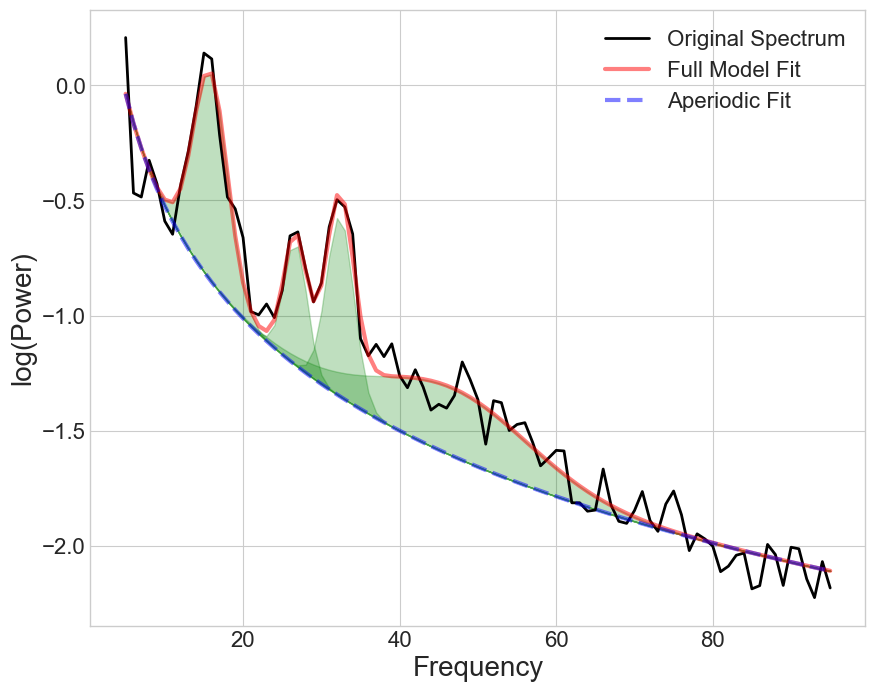

In [71]:
model = fooof.FOOOF(
        peak_width_limits=(2, 20.0),
        max_n_peaks=4,
        min_peak_height=0.0,
        peak_threshold=1.0,
        aperiodic_mode="fixed",
        verbose=True,
    )

# always fit a large Frequency band, later you can select Peaks within specific freq bands
freq_range = [5, 95]
model.fit(freqs=freqs, power_spectrum=power_spectrum, freq_range=freq_range)

# print the result
model.print_results()

# plot the Power Spectrum without shade
#model.report(freqs, power_spectrum, freq_range)

# Plot an example power spectrum, with a model fit
model.plot(plot_peaks='shade', peak_kwargs={'color' : 'green'})

In [72]:
beta_peaks = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(13.0, 35.0),
                    select_highest=False,
                    attribute="peak_params",
                )

# output beta_peaks: beta_peaks[0] = first Peak in beta range
# beta_peaks[0][0] = CF center frequency of first Peak
# beta_peaks[0][1] = Power of first Peak
# beta_peaks[0][2] = BandWidth of first Peak

In [73]:
peak_1 = beta_peaks[0]
peak_1

array([15.80561099,  0.90660617,  4.40086413])

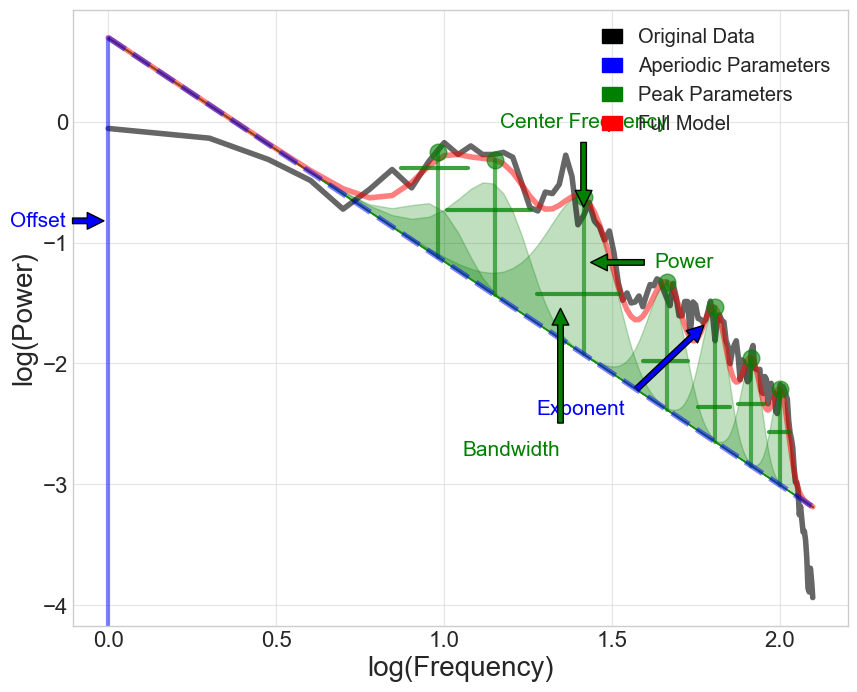

In [22]:
# Plot an annotated version of the power spectrum model
plot_annotated_model(fm1, plt_log=True)


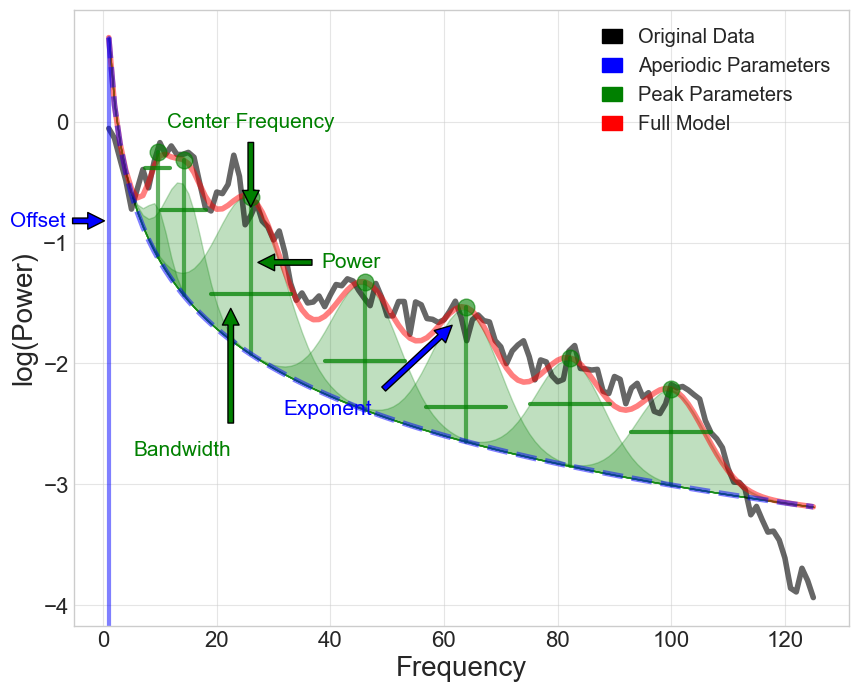

In [23]:
# plotted in log-log, here the aperiodic component is a straight line, hallmark of 1/f activity
# Plot an annotated version of the power spectrum model
plot_annotated_model(fm1)

## 2. Number of Peaks in frequency bands alpha, low beta, high beta, beta and gamma

In [24]:
fooof_group_result = loadResults.load_group_fooof_result()

In [103]:
freq_bands = ["alpha", "low_beta", "high_beta", "beta", "gamma"]
sessions = ["postop", "fu3m", "fu12m", "fu18m"]

session_peak_dict = {}

for ses in sessions:

    # get the dataframes for each session seperately
    fooof_session = fooof_group_result.loc[(fooof_group_result["session"]==ses)]

    # get total number of recordings (per STN all 15 recordings included) per session 
    total_number_all_channels_session = len(fooof_session)

    ######################## ALPHA PEAKS ########################
    # only keep rows, where no None in List
    alpha_list = []
    for item in fooof_session.alpha_peak_CF_power_bandWidth.values:

        if None not in item:
            alpha_list.append(item)

    
    alpha_session_df = fooof_session.loc[fooof_session["alpha_peak_CF_power_bandWidth"].isin(alpha_list)]

    # count how many alpha Peaks exist
    number_alpha_session =  len(alpha_session_df)

    # calculate % of channels with alpha Peaks in this session
    percentage_alpha_session = number_alpha_session / total_number_all_channels_session


    ######################## LOW BETA PEAKS ########################
    # only keep rows, where no None in List
    low_beta_list = []
    for item in fooof_session.low_beta_peak_CF_power_bandWidth.values:

        if None not in item:
            low_beta_list.append(item)

    
    low_beta_session_df = fooof_session.loc[fooof_session["low_beta_peak_CF_power_bandWidth"].isin(low_beta_list)]

    # count how many low_beta Peaks exist
    number_low_beta_session =  len(low_beta_session_df)

    # calculate % of channels with alpha Peaks in this session
    percentage_low_beta_session = number_low_beta_session / total_number_all_channels_session


    ######################## HIGH BETA PEAKS ########################
    # only keep rows, where no None in List
    high_beta_list = []
    for item in fooof_session.high_beta_peak_CF_power_bandWidth.values:

        if None not in item:
            high_beta_list.append(item)

    
    high_beta_session_df = fooof_session.loc[fooof_session["high_beta_peak_CF_power_bandWidth"].isin(high_beta_list)]

    # count how many high_beta Peaks exist
    number_high_beta_session =  len(high_beta_session_df)

    # calculate % of channels with high_beta Peaks in this session
    percentage_high_beta_session = number_high_beta_session / total_number_all_channels_session


    ######################## BETA PEAKS ########################
    # only keep rows, where no None in List
    beta_list = []
    for item in fooof_session.beta_peak_CF_power_bandWidth.values:

        if None not in item:
            beta_list.append(item)

    
    beta_session_df = fooof_session.loc[fooof_session["beta_peak_CF_power_bandWidth"].isin(beta_list)]

    # count how many beta Peaks exist
    number_beta_session =  len(beta_session_df)

    # calculate % of channels with beta Peaks in this session
    percentage_beta_session = number_beta_session / total_number_all_channels_session


    ######################## GAMMA PEAKS ########################
    # only keep rows, where no None in List
    gamma_list = []
    for item in fooof_session.gamma_peak_CF_power_bandWidth.values:

        if None not in item:
            gamma_list.append(item)

    
    gamma_session_df = fooof_session.loc[fooof_session["gamma_peak_CF_power_bandWidth"].isin(gamma_list)]

    # count how many gamma Peaks exist
    number_gamma_session =  len(gamma_session_df)

    # calculate % of channels with gamma Peaks in this session
    percentage_gamma_session = number_gamma_session / total_number_all_channels_session


    session_peak_dict[f"{ses}"] = [ses, total_number_all_channels_session, number_alpha_session, percentage_alpha_session,
                                   number_low_beta_session, percentage_low_beta_session,
                                   number_high_beta_session, percentage_high_beta_session,
                                   number_beta_session, percentage_beta_session,
                                   number_gamma_session, percentage_gamma_session,]
    
    session_peak_df = pd.DataFrame(session_peak_dict)
    session_peak_df.rename(index={
        0: "session",
        1: "total_chans_number",
        2: "number_chans_with_alpha_peaks",
        3: "percentage_chans_with_alpha_peaks",
        4: "number_chans_with_low_beta_peaks",
        5: "percentage_chans_with_low_beta_peaks",
        6: "number_chans_with_high_beta_peaks",
        7: "percentage_chans_with_high_beta_peaks",
        8: "number_chans_with_beta_peaks",
        9: "percentage_chans_with_beta_peaks",
        10: "number_chans_with_gamma_peaks",
        11: "percentage_chans_with_gamma_peaks",
    }, inplace=True)
    session_peak_df = session_peak_df.transpose()



In [104]:
session_peak_df

,session,total_chans_number,number_chans_with_alpha_peaks,percentage_chans_with_alpha_peaks,number_chans_with_low_beta_peaks,percentage_chans_with_low_beta_peaks,number_chans_with_high_beta_peaks,percentage_chans_with_high_beta_peaks,number_chans_with_beta_peaks,percentage_chans_with_beta_peaks,number_chans_with_gamma_peaks,percentage_chans_with_gamma_peaks
postop,postop,270,57,0.211111,140,0.518519,186,0.688889,223,0.825926,191,0.707407
fu3m,fu3m,360,57,0.158333,200,0.555556,337,0.936111,354,0.983333,178,0.494444
fu12m,fu12m,300,39,0.13,159,0.53,263,0.876667,283,0.943333,178,0.593333
fu18m,fu18m,150,30,0.2,67,0.446667,133,0.886667,144,0.96,78,0.52


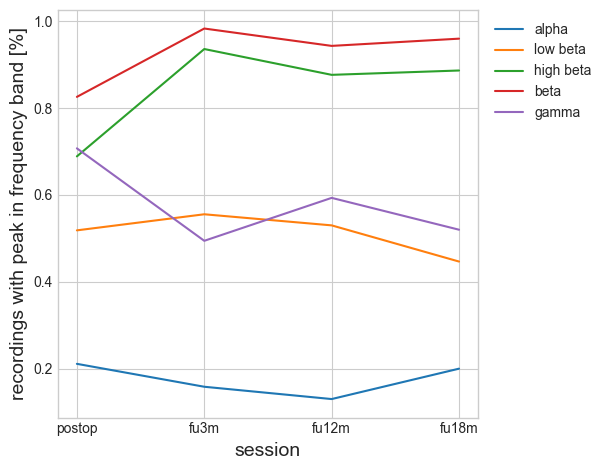

In [121]:
# plot line plot 

font = {"size": 14}

plt.plot(session_peak_df.session, session_peak_df.percentage_chans_with_alpha_peaks, label="alpha")
plt.plot(session_peak_df.session, session_peak_df.percentage_chans_with_low_beta_peaks, label="low beta")
plt.plot(session_peak_df.session, session_peak_df.percentage_chans_with_high_beta_peaks, label="high beta")
plt.plot(session_peak_df.session, session_peak_df.percentage_chans_with_beta_peaks, label="beta")
plt.plot(session_peak_df.session, session_peak_df.percentage_chans_with_gamma_peaks, label="gamma")

plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.0))
plt.xlabel("session", fontdict=font)
plt.ylabel("recordings with peak in frequency band [%]", fontdict=font)
plt.tight_layout()
